In [59]:
%matplotlib inline
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams['font.size'] = 12

columns = ['hour', 'last_windspd', 'last_no', 'last_no2', 'last_nox', 'last_o3', 'no', 'no2', 'nox', 'o3']

df = pandas.read_csv('data00_100000_clean.csv')
df = df.drop(['AQS_Code', 'Latitude', 'Longitude', 'epoch', 'winddir', 'time', 'date', 'day'], axis=1)
df['last_windspd'] = df['windspd'].shift(1)
df['last_no'] = df['no'].shift(1)
df['last_no2'] = df['no2'].shift(1)
df['last_nox'] = df['nox'].shift(1)
df['last_o3'] = df['o3'].shift(1)
df = df.drop(df.index[[0]])




/Users/carroll/anaconda3/envs/pollen/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


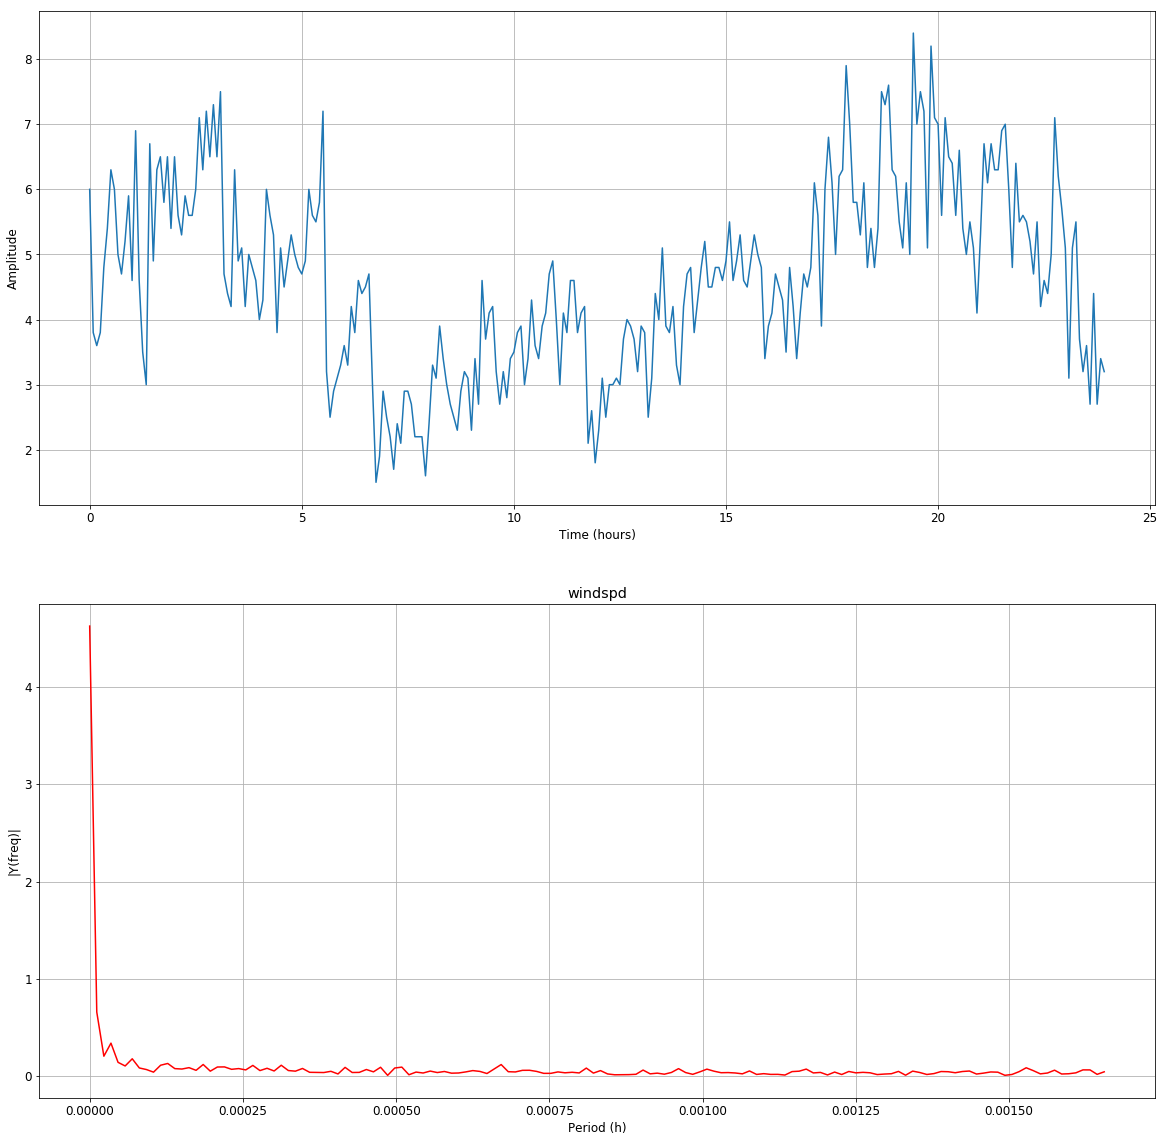

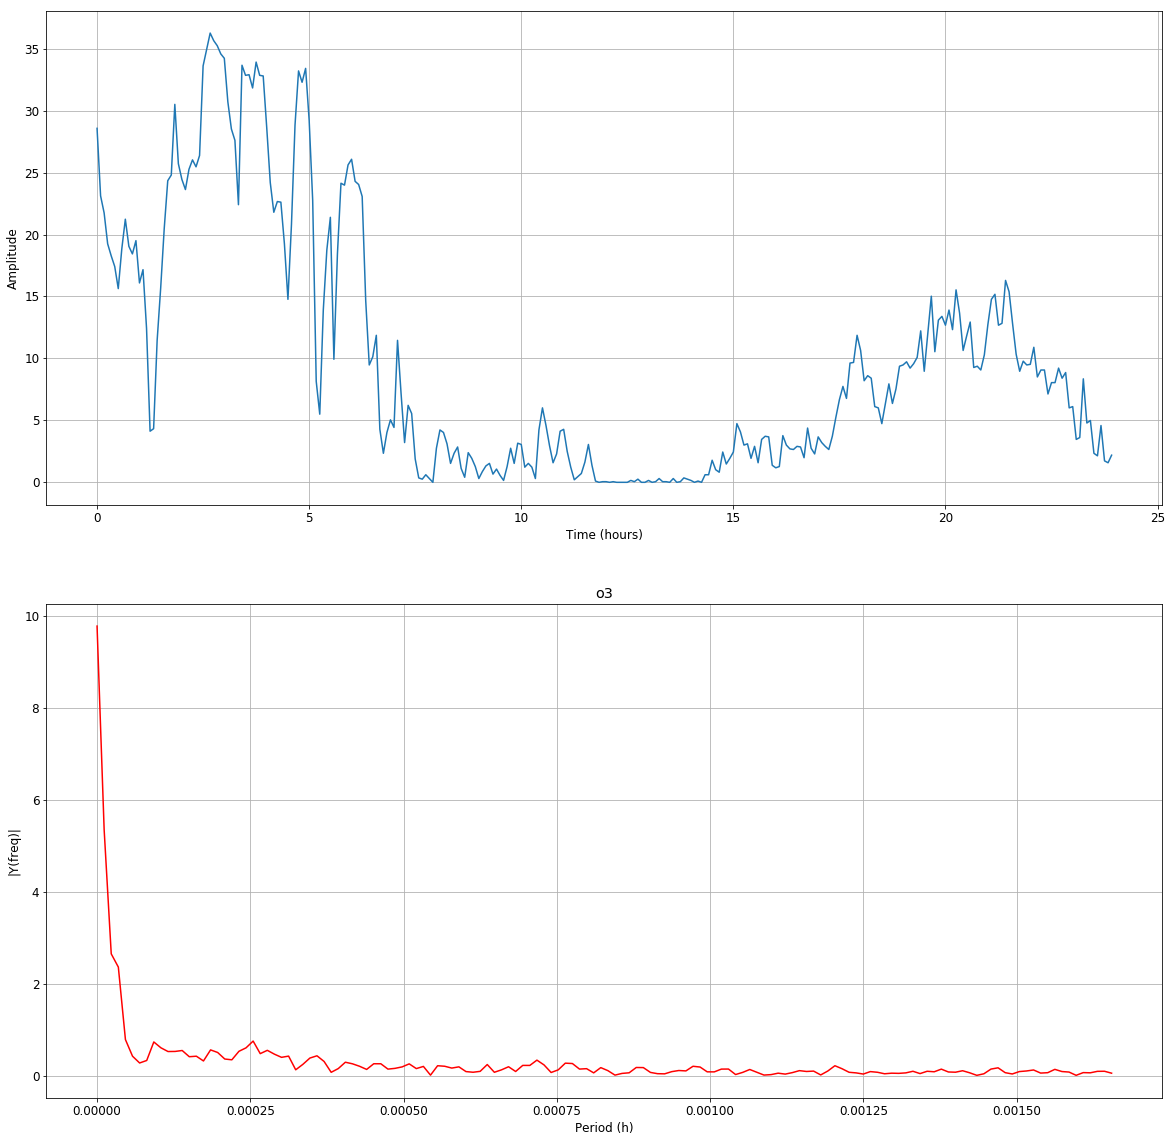

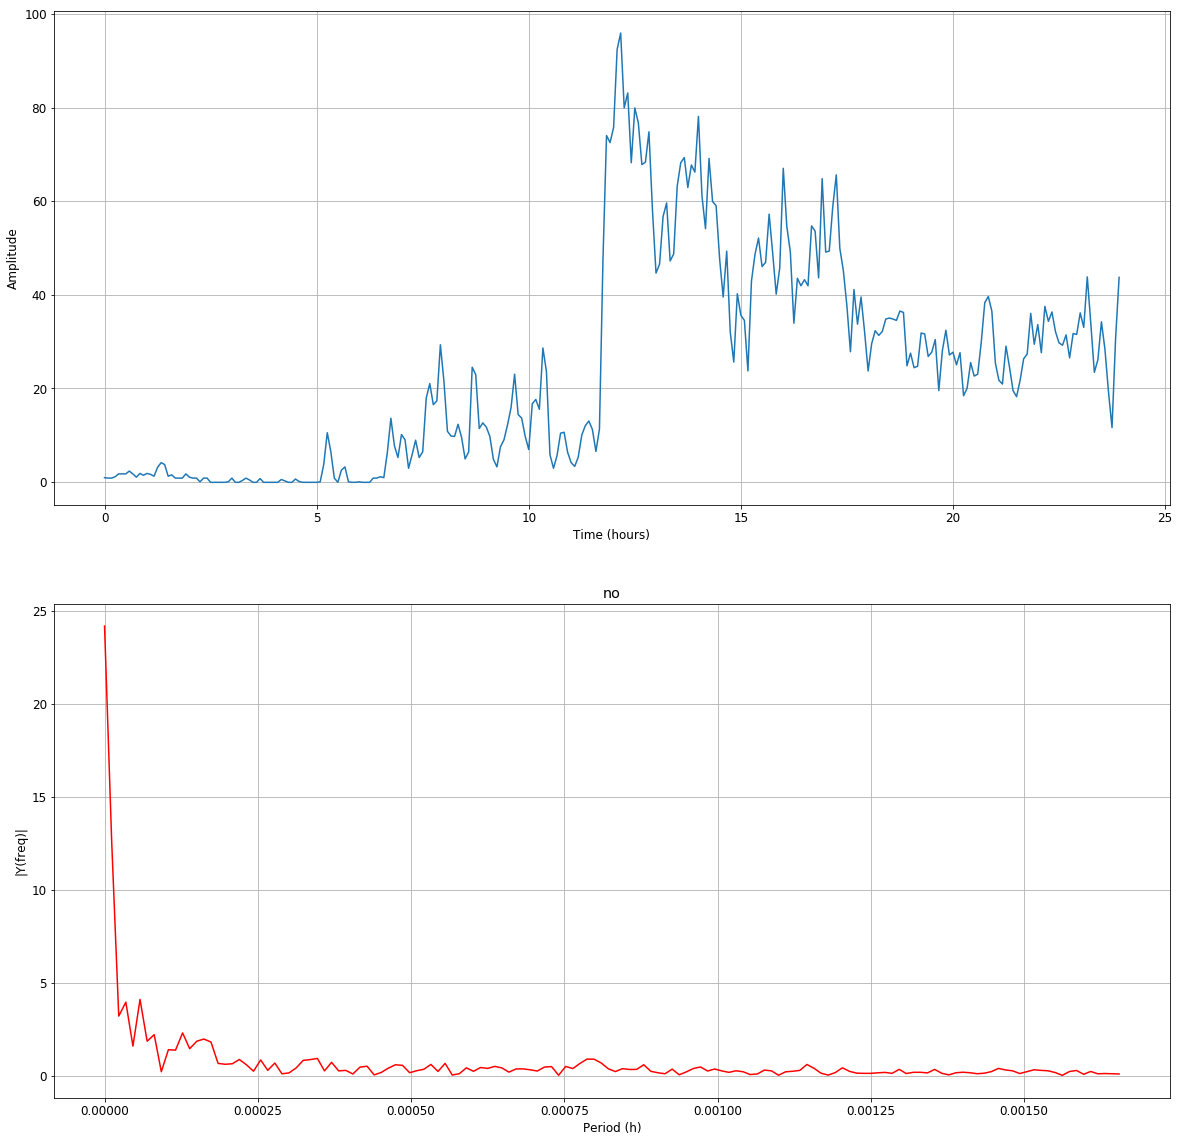

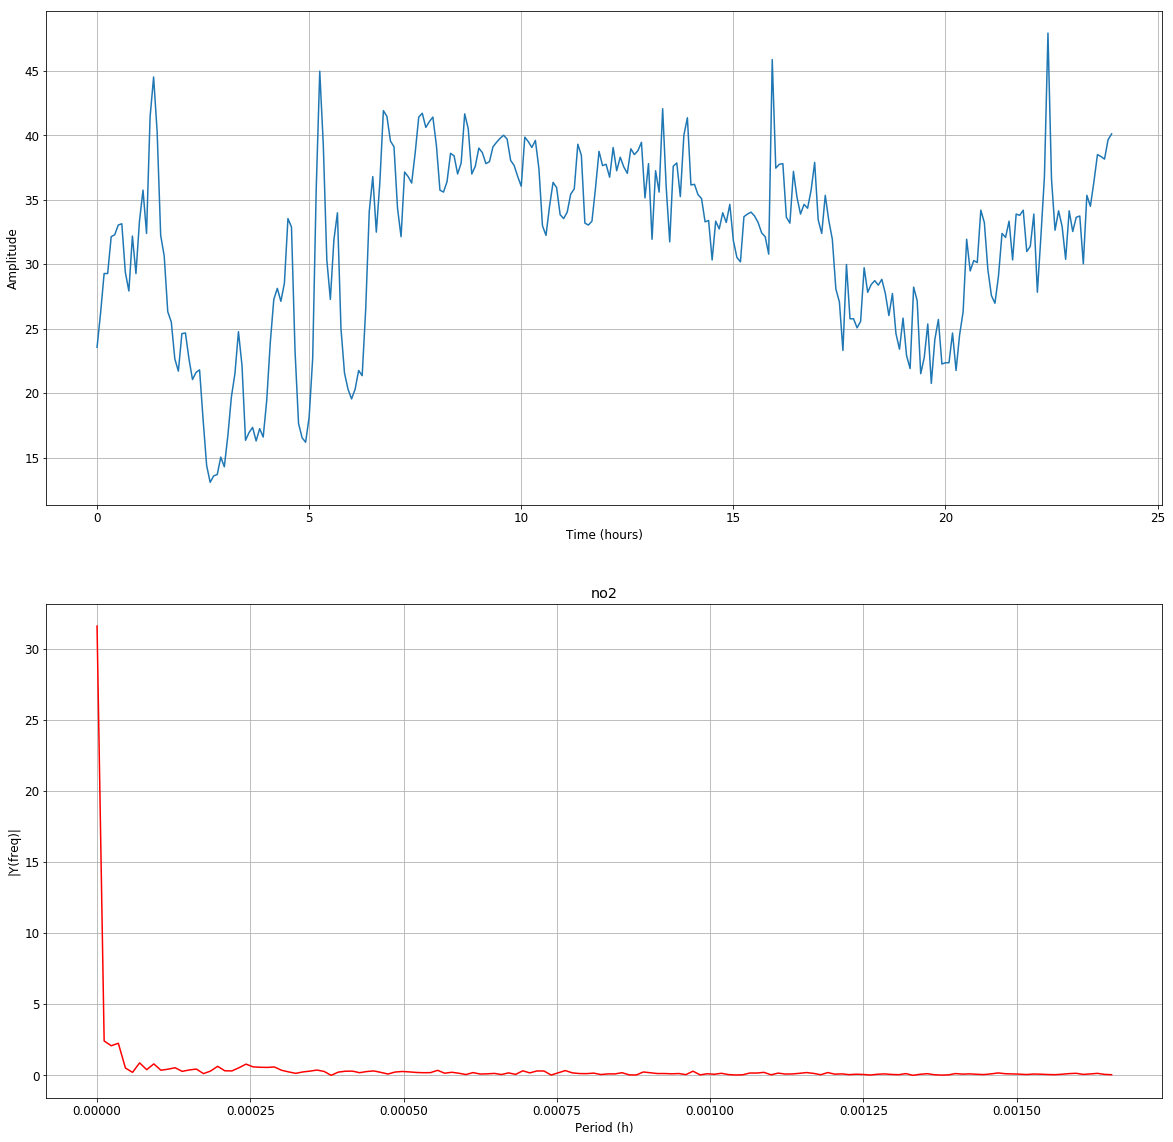

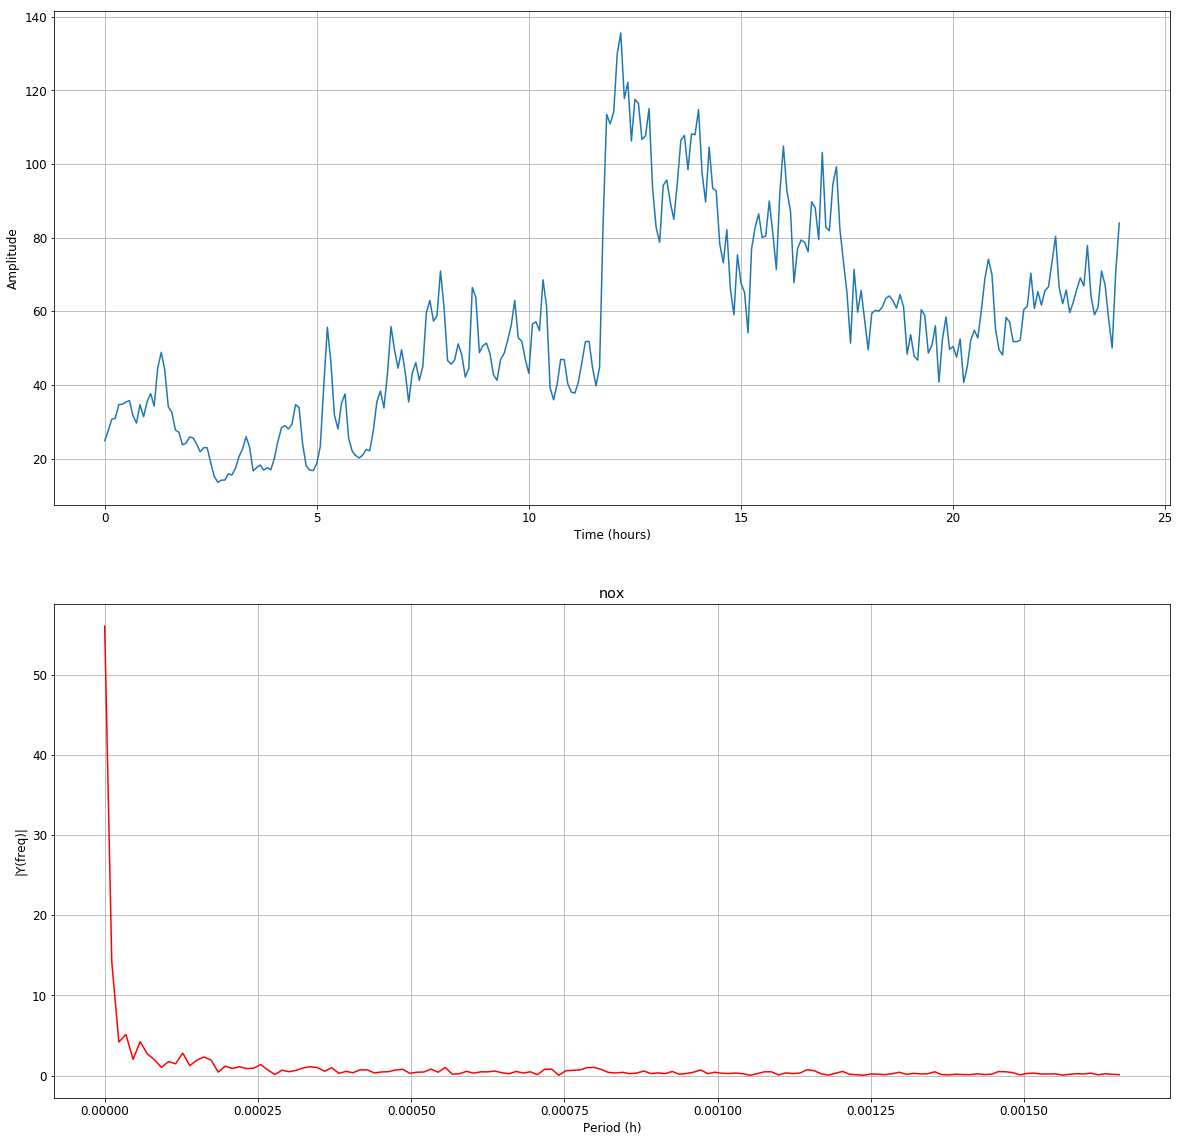

In [61]:
for key in ['windspd', 'o3', 'no', 'no2', 'nox']:
    # 24 Hours worth
    y = df[key].head(int(60*24/5))

    Fs = 1/(60*5)  # sampling rate
    Ts = 1.0/Fs; # sampling interval
        
    t = np.arange(0,60*5*len(y),Ts) # time vector

    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    
    period = (1 / frq) / (60*60)

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, ax = plt.subplots(2, 1)
    ax[0].plot(t/(60*60),y)
    plt.title(key)
    ax[0].grid()
    ax[0].set_xlabel('Time (hours)')
    ax[0].set_ylabel('Amplitude')
    ax[1].plot(frq, abs(Y),'r') # plotting the spectrum
    plt.title(key)
    ax[1].grid()
    ax[1].set_xlabel('Period (h)')
    ax[1].set_ylabel('|Y(freq)|')
    plt.show()
